<a href="https://colab.research.google.com/github/ananyag27/Machine-Learning-Lab/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cleaned_survey.csv')
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']
print(df.columns)

Index(['Age', 'Gender', 'Race', 'BMI', 'Smoking', 'Heavy Drinking',
       'Sleep Duration (Hours)', 'Arthritis', 'Liver Condition',
       'Parental Osteoporosis', 'Osteoporosis'],
      dtype='object')


In [ ]:
import pandas as pd
df = pd.read_csv('/content/cleaned_survey.csv')
unique_classes = df['Osteoporosis'].unique()
print("Unique classes in the 'Osteoporosis' column:", unique_classes)


Unique classes in the 'Osteoporosis' column: ['No' 'Yes']


In [ ]:
X = df.drop('Sleep Duration (Hours)', axis=1).select_dtypes(include=[np.number])  # Use only numerical features
y = df['Sleep Duration (Hours)']

def calculate_intraclass_interclass(X, y):
    classes = y.unique()
    class_means = {}
    class_spreads = {}

    for cls in classes:
        class_data = X[y == cls]
        class_means[cls] = class_data.mean(axis=0)
        class_spreads[cls] = class_data.std(axis=0)

    interclass_distances = {}
    for cls1 in classes:
        for cls2 in classes:
            if cls1 != cls2:
                distance = np.linalg.norm(class_means[cls1] - class_means[cls2])
                interclass_distances[(cls1, cls2)] = distance

    return class_means, class_spreads, interclass_distances

class_means, class_spreads, interclass_distances = calculate_intraclass_interclass(X, y)
print("Class Means:", class_means)
print("Class Spreads:", class_spreads)
print("Interclass Distances:", interclass_distances)

Class Means: {7.0: Age    60.455882
BMI    29.011111
dtype: float64, 9.0: Age    65.548736
BMI    29.001805
dtype: float64, 8.0: Age    62.625291
BMI    28.796587
dtype: float64, 5.0: Age    58.847458
BMI    29.423164
dtype: float64, 6.0: Age    59.003356
BMI    29.292953
dtype: float64, 10.0: Age    65.903553
BMI    28.630457
dtype: float64, 4.0: Age    58.682081
BMI    29.639306
dtype: float64, 3.0: Age    59.631579
BMI    30.278947
dtype: float64, 11.0: Age    66.695652
BMI    30.711594
dtype: float64, 9.5: Age    66.990826
BMI    29.100000
dtype: float64, 4.5: Age    64.333333
BMI    30.110000
dtype: float64, 8.5: Age    66.320833
BMI    29.919583
dtype: float64, 10.5: Age    69.314286
BMI    28.882857
dtype: float64, 7.5: Age    63.607784
BMI    29.027844
dtype: float64, 6.5: Age    62.072816
BMI    30.262621
dtype: float64, 5.5: Age    63.563380
BMI    29.849296
dtype: float64, 3.5: Age    62.642857
BMI    29.371429
dtype: float64}
Class Spreads: {7.0: Age    10.558393
BMI     5.

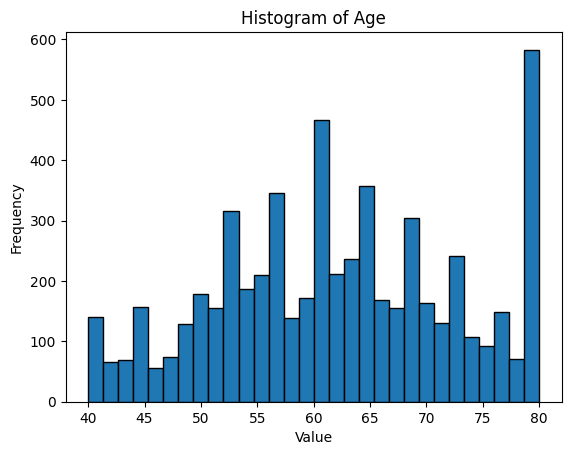

Mean of Age: 62.016292231178184
Variance of Age: 114.39297757469356


In [ ]:
import matplotlib.pyplot as plt
feature = 'Age'
data = X[feature]
plt.hist(data, bins=30, edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
mean = np.mean(data)
variance = np.var(data)
print(f"Mean of {feature}: {mean}")
print(f"Variance of {feature}: {variance}")

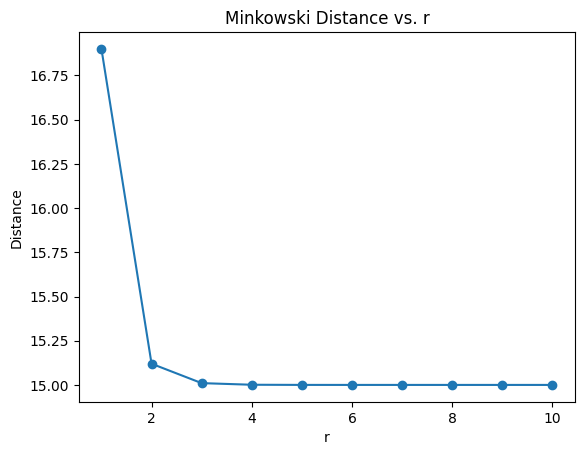

In [ ]:
def minkowski_distance(x1, x2, r):
  return np.linalg.norm(x1 - x2, ord=r)

feature_vector_1 = X.iloc[0].values
feature_vector_2 = X.iloc[1].values
r_values = range(1, 11)
distances = [minkowski_distance(feature_vector_1, feature_vector_2, r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv('/content/cleaned_survey.csv')
X = df.drop('Age', axis=1).select_dtypes(include=[np.number])
y = df['Age']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN (k=3): {accuracy:.2f}")
predictions = knn.predict(X_test)
print("Predictions on test set:",predictions)

Accuracy of kNN (k=3): 0.03
Predictions on test set: [40. 40. 54. ... 52. 51. 46.]


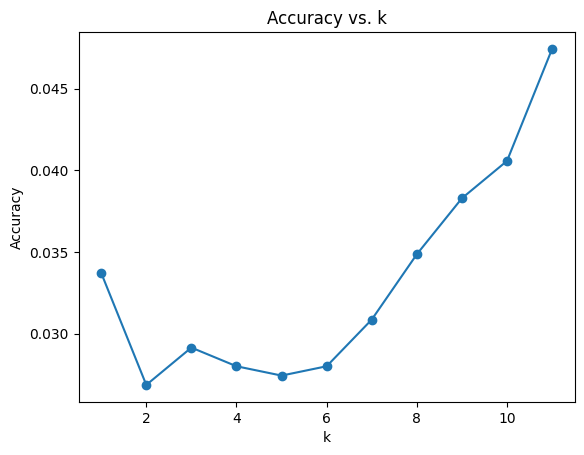

In [ ]:
k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()